[*********************100%***********************]  1 of 1 completed

2.20.0
Epoch 1/50



/home/npandey/.conda/envs/tfenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0066
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.5504e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.5680e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.7684e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.5821e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.8381e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.7540e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.2885e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.9776e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.9671e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.9375e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.6602e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.5394e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.8032e-04
Epoch 15/50
52/52 ━━━━━━━━━━━━

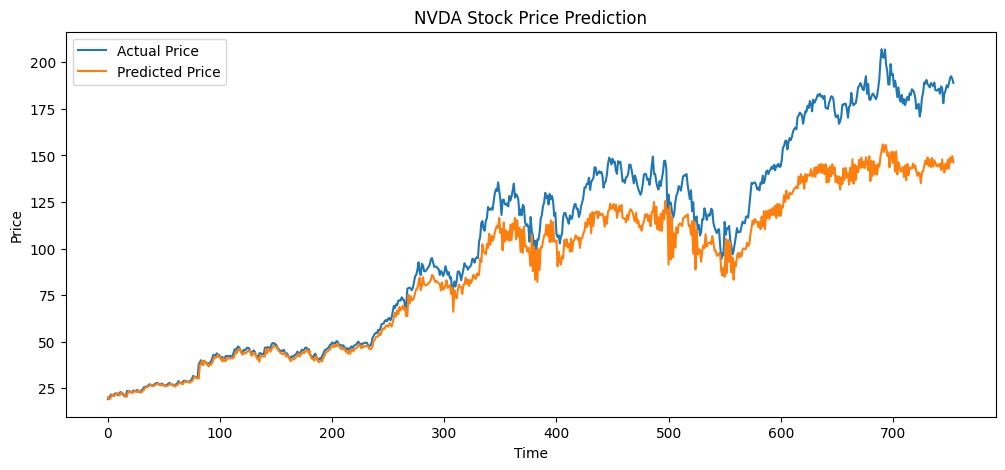

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

#1️⃣ Data collection
now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)

ticker = "NVDA"
df = yf.download(ticker, start, now)
df = df[['Close']]


#2️⃣ Train / test split (time-aware)
split = int(len(df) * 0.7)

data_training = df.iloc[:split]
data_testing  = df.iloc[split:]


#3️⃣ Scaling (FIT ONLY ON TRAINING)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(data_training)


#4️⃣ Create training sequences (SCALED)
x_train = []
y_train = []

for i in range(100, train_scaled.shape[0]):
    x_train.append(train_scaled[i-100:i, 0])
    y_train.append(train_scaled[i, 0])

x_train = np.array(x_train).reshape(-1, 100, 1)
y_train = np.array(y_train)




#5️⃣ Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


#6️⃣ Train model
print(tf.__version__)
model.fit(x_train, y_train, epochs=50, batch_size=32)


#7️⃣ Prepare test data (CORRECT WAY)

past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], axis=0)

input_data = scaler.transform(final_df)





#8️⃣ Create test sequences
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i, 0])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test).reshape(-1, 100, 1)
y_test = np.array(y_test)




#9️⃣ Make predictions + inverse scaling
y_predicted = model.predict(x_test)

y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))







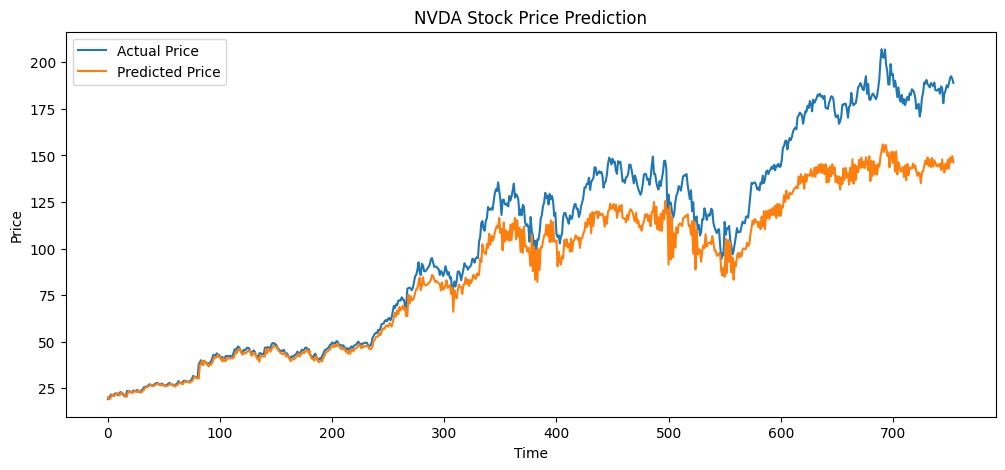

In [3]:
#🔟 Plot results (NOW THEY MATCH)
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual Price")
plt.plot(y_predicted, label="Predicted Price")
plt.title("NVDA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
